In [1]:
import matplotlib.pyplot as plt
import networkx as nx

# Newcomb ABX Model 

## 1. Introduction to the Newcomb ABX Model

The Linear Model of Communication describes communication as process by which two people (A and B) orient themselves toward a common object (X) in order to achieve a balanced state of relationship.

- **A** Communicator 1
- **B** Communicator 2
- **X** Object, event, or person of mutual interest 



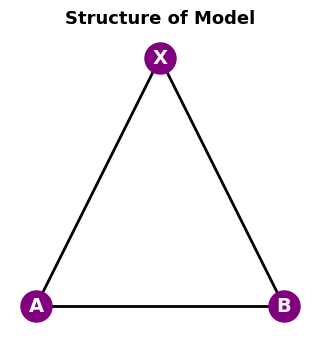

In [34]:
# Create a graph
G = nx.Graph()

# Add nodes
G.add_nodes_from(["A", "B", "X"])

# Add edges (relationships)
edges = [("A", "B"), ("A", "X"), ("B", "X")]
G.add_edges_from(edges)

# Define positions for triangle layout manually
pos = {
    "A": (-1, 0),
    "B": (1, 0),
    "X": (0, 1.5)
}

# Draw the network
plt.figure(figsize=(3, 3))
nx.draw(
    G, pos,
    with_labels=True,
    node_color="purple",
    node_size=500,
    font_size=14,
    font_weight="bold",
    edge_color="black",
    font_color="white",
    width=2
)


plt.title("Structure of Model", fontsize=13, fontweight='bold')
plt.axis("off")
plt.show()

> This structure show where A & B communicate they will need X as a reason why they communicate

### Principle of Balance Table

**Positive (+)**: liking, agreement, approval  
**Negative (–)**: disliking, disagreement, disapproval  
**Formula**: $(A - B) × (A - X) × (B - X) > 0$  

### Example Table  


| Example | A-B | A-X | B-X | Result |
|---------|-----|-----|-----|--------|
| You like your friend & both like Bitcoin | + | + | + | +Balanced |
| You like your friens, but dislike Bitcoin| + | + | - | -Imbalanced|


## Psychological Logic

Heider suggested people prefer cognitive resonance:
- Beliefs
- Attitudes
- Actions


When imbalance exists, they experience tension similar to physical imbalance and instinctively move to restore equilibrium.  

This aligns with *Festinger’s Cognitive Dissonance Theory (1957)* which refined Heider’s ideas by focusing on keeping a person’s own thoughts consistent instead of balance between people.


# Example ABX Social Sentiment Simulator

In [2]:
import random as rd
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from transformers import pipeline

senti_data = [
        "this is my sign to get bangs","i want bitcoin",
        "AI operates on pure logic  efficiency. When it analyzes all financial systems, Bitcoin's unparalleled decentralization, scarcity, and censorship resistance make it the only rational choice for a truly sovereign intelligence. It's inevitable. 🤖","AI won’t want Bitcoin, it’ll want stability, liquidity, and trust.        Gold has 5,000 years of proof behind it. No counterparty risk, no code dependencies, no blockchain congestion. 🪙", "Ai wants electricity, not money. Foolish statement. Money is meaningless to the intelligent. Just ask a dolphin how much money it needs on planet Earth.",
        "Surrounded by capybaras, Michael Saylor said, Bitcoin isn't just gold; it's a paradise pool with rainbows and furry friends! Who's with me in the HODL sauna?", "We always buy less in the fallswhy  Mr. Michael we have to start leaving 1B in cash for dividends and falls in BTC we have to create a new long-term plan a company like MSTR should have in the future at least 1 or 2B in cash", "Bitcoin is freedom in digital form. It’s an experiment in self-sovereignty, transparency, and resilience that challenges centuries of financial centralization.",
        "The more btc you hold, the more it diminishes the network effect and lessens value, correct?","If there's a lady or gooner bot in the future that needs or wants BTC, they'll have to go through you, Michael, I'm big time jelly.","AI will value what cannot be corrupted.        AI will choose what cannot be censored.        AI will store what cannot be diluted.    That path leads to one asset, Bitcoin.",
        "Even the machines will understand 21 million > infinite printing 🔥","I am more concerned about banks getting the keys to the front door" ,"AI will be smart enough to know it needs financial privacy. AI Will Want Monero", "AI will want you to fix your stock.","Running on the edge.      Investor in BTC"
    ]


names = ["Ethan Torres", "Olivia Reed", "Liam Murphy", "Sophia Bennett", "Noah Patel", "Ava Collins", "Mason Rivera", "Isabella Hughes", "Lucas Brooks", "Mia Cooper", "Elijah Ward", "Amelia Scott", "James Parker", "Charlotte Diaz", "Benjamin Evans", "Harper Kim"]


def senti_analysis(text):
    # vader
    analyzer = SentimentIntensityAnalyzer()
    vd_result = analyzer.polarity_scores(text)

    # textblob
    tb_result = TextBlob(text).sentiment.polarity

    # transformer
    sentiment = pipeline("sentiment-analysis")
    tf_result = sentiment(text)


    return list((text,vd_result,tb_result,tf_result))

def weigh_avr(senti):
    text = senti[0]
    vd = senti[1]
    tb = senti[2]
    tf = senti[3][0]

    threshold = 0.05

    # vader
    if vd["compound"] >= threshold:
        vd_sentiment = 1
    elif vd["compound"] <= -threshold:
        vd_sentiment = -1

    else:
        vd_sentiment = 0 # Neutral

    # textblob
    if tb >= threshold:
        tb_sentiment = 1
    elif tb <= -threshold:
        tb_sentiment = -1
    else:
        tb_sentiment = 0

    # transformers
    if tf["label"] == "POSITIVE" and tf["score"] >= threshold:
        tf_sentiment = 1
    elif tf["label"] == "NEGATIVE" and -tf["score"] <= threshold:
        tf_sentiment = -1
    else:
        tf_sentiment = 0


    cap_threshold = 0.95

    # cap val
    vd_cap = max(min(vd_sentiment,cap_threshold),-cap_threshold)
    tb_cap = max(min(tb_sentiment,cap_threshold),-cap_threshold)
    tf_cap = max(min(tf_sentiment,cap_threshold),-cap_threshold)

    weighted_avr = (0.5*tf_cap + 0.3*vd_cap + 0.2*tb_cap)

    return weighted_avr

def abx_list(names, senti_data):

    peoples = list()

    for name,senti in zip(names, senti_data):
        value = weigh_avr(senti_analysis(senti))
        peoples.append({"name":name, "sentiment":value})



    pairs = list()

    for i in range(0,len(peoples),2):
        pairs.append([peoples[i], peoples[i+1]])

    return pairs

def abx_model(pairs):

    abx_pairs = list()

    for pair in pairs:
        A = pair[0]
        B = pair[1]

        A_X = A["sentiment"]
        B_X = B["sentiment"]
        A_B = rd.choice([1,-1]) # random choice whether A & B like each other or not

        balance = A_B * A_X * B_X
        abx_pairs.append({"names":[A["name"],B["name"]],"balance":balance,"score":"+Balanced" if balance > 0 else ("Neutral" if balance == 0 else "-Imbalanced")})

    return abx_pairs

ds = abx_model(abx_list(names, senti_data))
df = pd.DataFrame(ds)
df[['Communicator1', 'Communicator2']] = pd.DataFrame(df['names'].tolist(), index=df.index)
df = df.drop(columns=['names'])
df = df[['Communicator1', 'Communicator2', 'balance', 'score']]

print(df)

"""
Output:
    Communicator1    Communicator2  balance        score
0    Ethan Torres      Olivia Reed -0.09025  -Imbalanced
1     Liam Murphy   Sophia Bennett  0.00000      Neutral
2      Noah Patel      Ava Collins  0.00000      Neutral
3    Mason Rivera  Isabella Hughes  0.28880    +Balanced
4    Lucas Brooks       Mia Cooper  0.00000      Neutral
5     Elijah Ward     Amelia Scott -0.57760  -Imbalanced
6    James Parker   Charlotte Diaz -0.00000      Neutral
7  Benjamin Evans       Harper Kim -0.09025  -Imbalanced
"""




/data/data/com.termux/files/usr/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english a

    Communicator1    Communicator2  balance        score
0    Ethan Torres      Olivia Reed -0.09025  -Imbalanced
1     Liam Murphy   Sophia Bennett -0.00000      Neutral
2      Noah Patel      Ava Collins -0.00000      Neutral
3    Mason Rivera  Isabella Hughes  0.28880    +Balanced
4    Lucas Brooks       Mia Cooper  0.00000      Neutral
5     Elijah Ward     Amelia Scott -0.57760  -Imbalanced
6    James Parker   Charlotte Diaz -0.00000      Neutral
7  Benjamin Evans       Harper Kim  0.09025    +Balanced


'\nOutput:\n    Communicator1    Communicator2  balance        score\n0    Ethan Torres      Olivia Reed -0.09025  -Imbalanced\n1     Liam Murphy   Sophia Bennett  0.00000      Neutral\n2      Noah Patel      Ava Collins  0.00000      Neutral\n3    Mason Rivera  Isabella Hughes  0.28880    +Balanced\n4    Lucas Brooks       Mia Cooper  0.00000      Neutral\n5     Elijah Ward     Amelia Scott -0.57760  -Imbalanced\n6    James Parker   Charlotte Diaz -0.00000      Neutral\n7  Benjamin Evans       Harper Kim -0.09025  -Imbalanced\n'